### Filename: AQLI_TEST.ipynb
#### Author: Shivani_Shukla
#### Date: 23/02/2025


In [226]:
# import libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import contextily as ctx  # For basemaps
import numpy as np
import dask.dataframe as dd


In [228]:
#Read the AQLI 1998-2021 GADM2 dataset csv 
df = pd.read_csv("gadm2_aqli_1998_2021.csv")
#df

In [229]:
# Inspect column names CSV
#print(df.columns)

In [230]:
# Read the AQLI 1998-2021 GADM2 shapefile 
shapefile_path = "aqli_gadm2_final_june302023.shp"
gdf = gpd.read_file(shapefile_path)

In [233]:
# Display the first few rows
#print(gdf.head())

In [234]:
# Inspect column names
#print(gdf.columns)

### 1. Basic wrangling tasks and questions 

####   1.1

In [155]:
# Filter for India
df_india = df[df['country'] == 'India']

# Count unique GADM2 regions
num_gadm2_regions = df_india['name_2'].nunique()

print(f"Number of GADM2 regions in India: {num_gadm2_regions}")

Number of GADM2 regions in India: 684


#### 1.2

In [167]:

# Select PM2.5 columns (from 1998 to 2021)
pm_columns = [col for col in df.columns if col.startswith("pm")]

# Group by 'country' and compute the mean PM2.5 for each year
country_pm_avg = df.groupby("country")[pm_columns].mean().reset_index()

# Compute the overall average PM2.5 across all years for each country
country_pm_avg["pm25_overall_avg"] = country_pm_avg[pm_columns].mean(axis=1)

# Keep only relevant columns (Country + Overall PM2.5 Avg)
final_df = country_pm_avg[["country", "pm25_overall_avg"]]

# Save the final result to a CSV file
final_df.to_csv("country_pm25_overall_avg.csv", index=False)

print("✅ Country-wise overall PM2.5 averages saved to csv")


Country-wise overall PM2.5 averages saved to csv


In [169]:
# Select PM2.5 column for the year 2021
pm_2021_column = "pm2021"

# Group by 'country' and compute the average PM2.5 for 2021
country_pm_2021_avg = df.groupby("country")[pm_2021_column].mean().reset_index()

# Sort in descending order to find the most polluted countries
top_10_polluted = country_pm_2021_avg.sort_values(by=pm_2021_column, ascending=False).head(10)

print(top_10_polluted)



                              country     pm2021
17                         Bangladesh  71.800781
100                             India  51.091826
151                             Nepal  42.204416
165                          Pakistan  34.554938
147                           Myanmar  34.553250
59   Democratic Republic of the Congo  33.831088
39                           Cameroon  33.579828
179             Republic of the Congo  32.617917
182                            Rwanda  32.372000
36                            Burundi  32.155038


#### 1.3

In [173]:

# Select relevant columns
columns_needed = ['country', 'name_1', 'name_2', 'pm1998', 'pm2005', 'pm2021']
df_selected = df[columns_needed]

# Drop rows where any of these PM values are missing
df_selected = df_selected.dropna(subset=['pm1998', 'pm2005', 'pm2021'])

# Rename specific columns
df_selected = df_selected.rename(columns={'country': 'Country', 'name_1': 'State/Province', 'name_2': 'District'})


# Find the most polluted GADM2 region for each year
most_polluted_1998 = df_selected.loc[df_selected['pm1998'].idxmax()]
most_polluted_2005 = df_selected.loc[df_selected['pm2005'].idxmax()]
most_polluted_2021 = df_selected.loc[df_selected['pm2021'].idxmax()]

# Print results
print("Most Polluted GADM2 Region in 1998:")
print(most_polluted_1998[['Country', 'State/Province', 'District', 'pm1998']])

print("\nMost Polluted GADM2 Region in 2005:")
print(most_polluted_2005[['Country', 'State/Province', 'District', 'pm2005']])

print("\nMost Polluted GADM2 Region in 2021:")
print(most_polluted_2021[['Country', 'State/Province', 'District', 'pm2021']])


Most Polluted GADM2 Region in 1998:
Country                   India
State/Province    Uttar Pradesh
District                  Unnao
pm1998                    78.55
Name: 17950, dtype: object

Most Polluted GADM2 Region in 2005:
Country                  India
State/Province    NCT of Delhi
District          NCT of Delhi
pm2005                   98.75
Name: 17710, dtype: object

Most Polluted GADM2 Region in 2021:
Country                  India
State/Province    NCT of Delhi
District          NCT of Delhi
pm2021                  126.51
Name: 17710, dtype: object


####  1.4

PM2.5 trendline plot saved


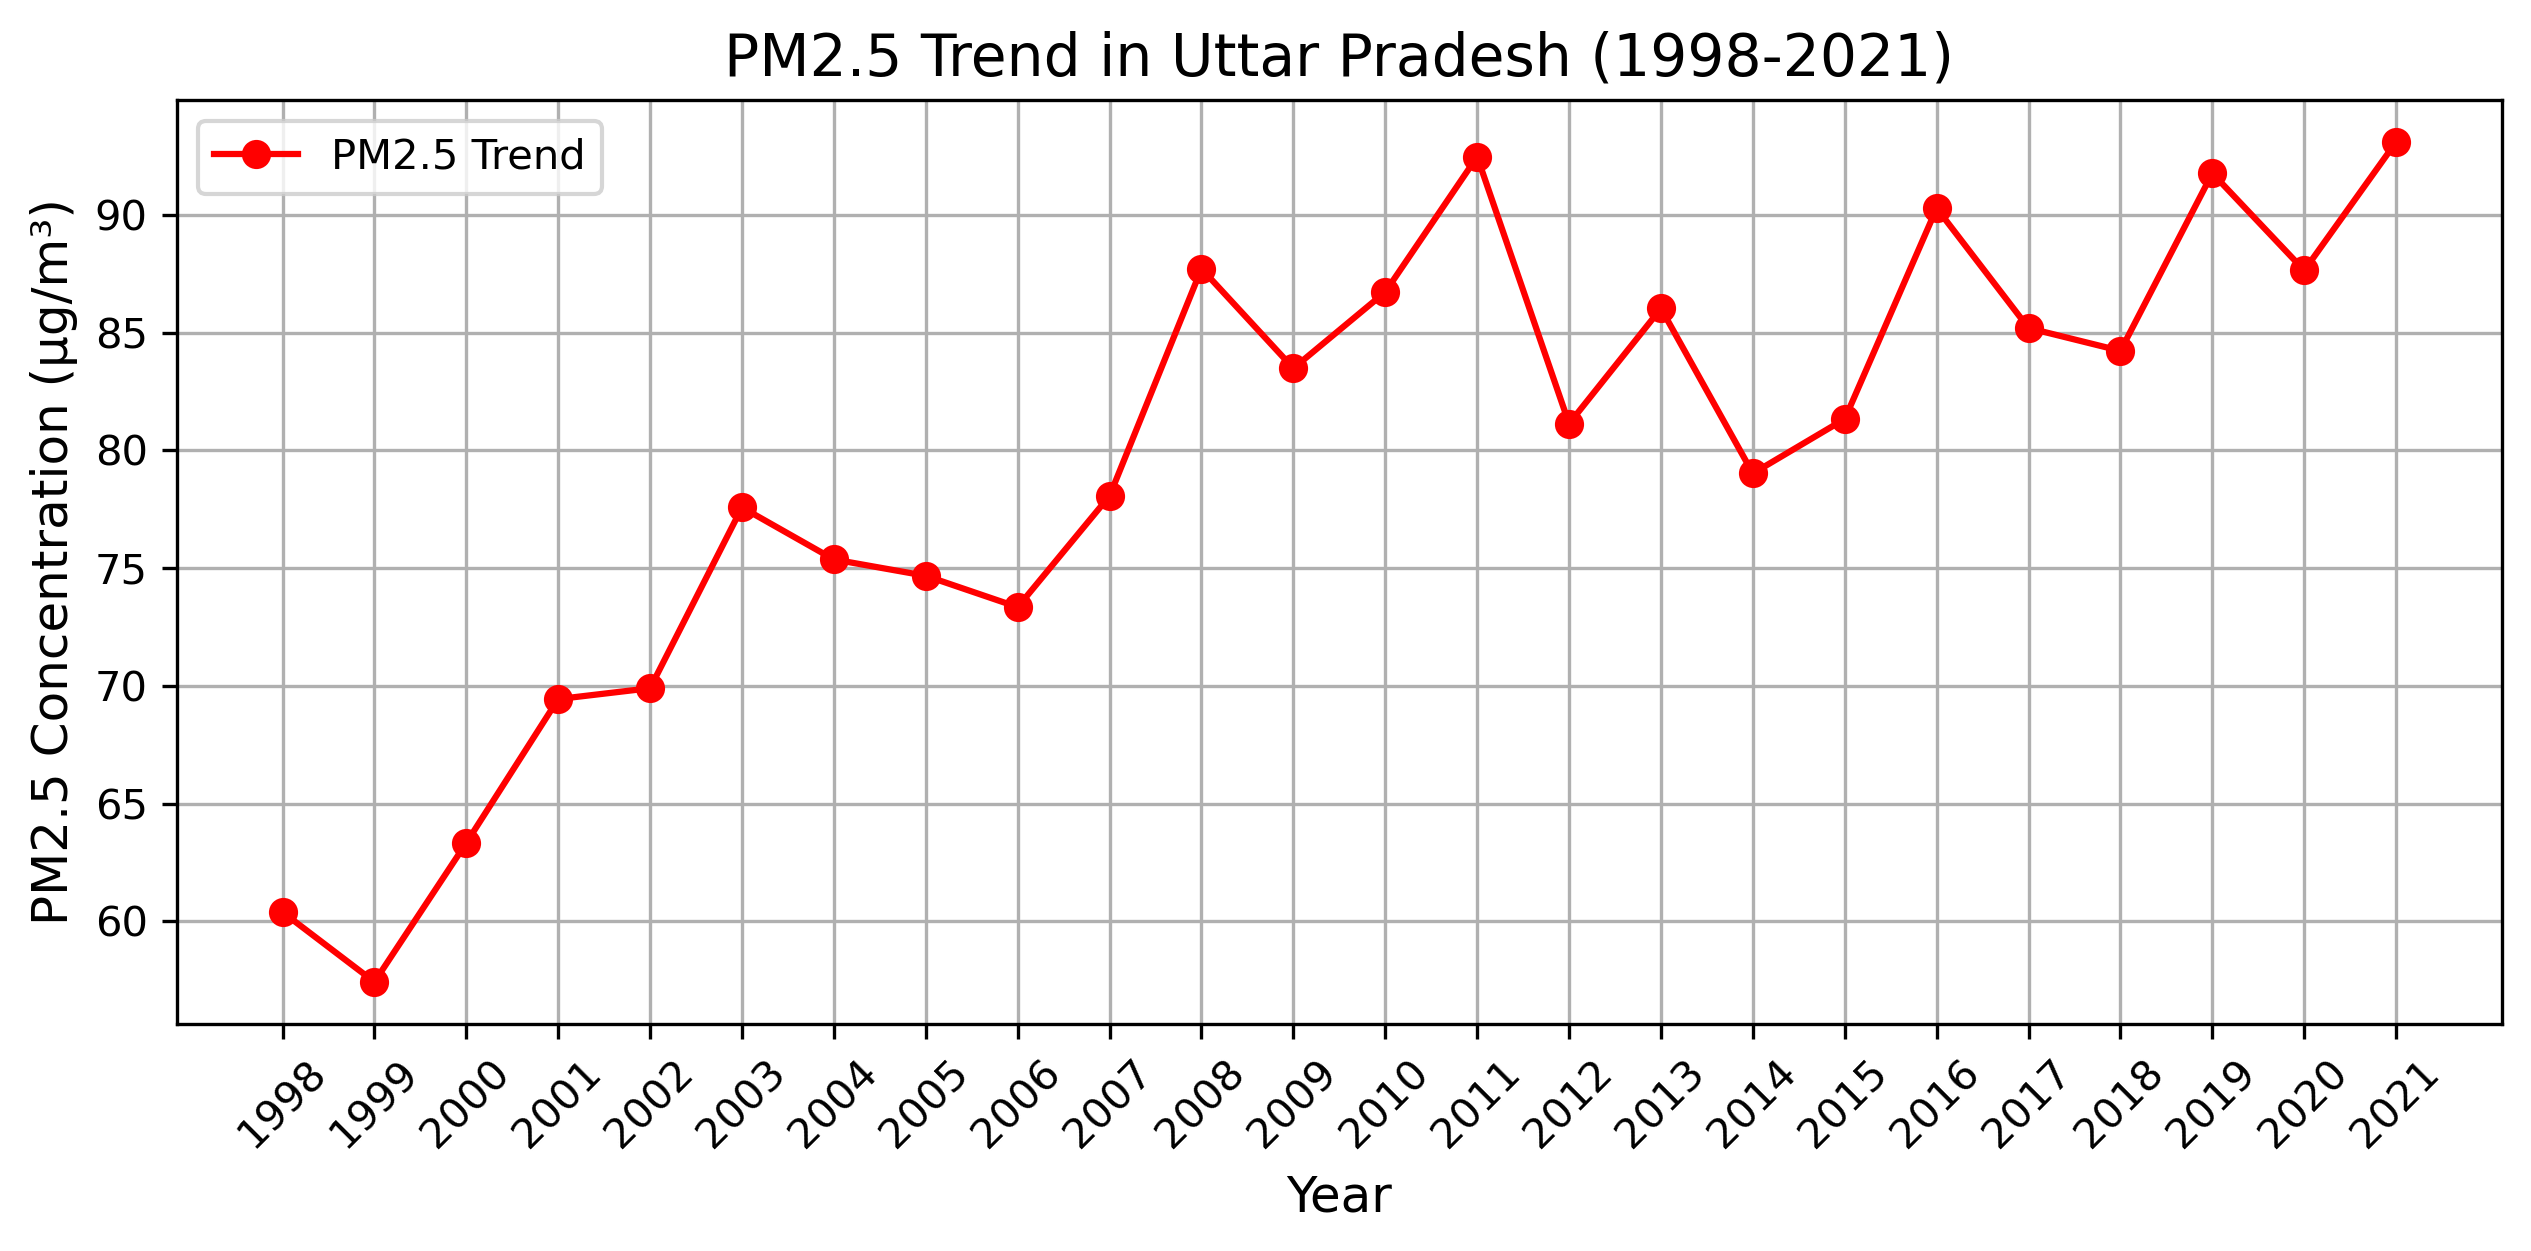

In [180]:

# Select PM2.5 columns (1998-2021)
pm_columns = [col for col in df.columns if col.startswith("pm")]

# Filter data for Uttar Pradesh
up_df = df[(df["country"] == "India") & (df["name_1"] == "Uttar Pradesh")]

# Compute yearly average PM2.5 (column-wise)
up_pm_yearly_avg = up_df[pm_columns].mean()

# Convert index to years
years = list(range(1998, 2022))  # Ensures the X-axis explicitly starts at 1998 and ends at 2021

# Plot the PM2.5 trendline
plt.figure(figsize=(10, 4), dpi=300)
plt.plot(years, up_pm_yearly_avg, marker="o", linestyle="-", color="r", label="PM2.5 Trend")

# Set x-axis labels to start from 1998 and end at 2021
plt.xticks(years, rotation=45) 

# Labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("PM2.5 Concentration (µg/m³)", fontsize=12)
plt.title("PM2.5 Trend in Uttar Pradesh (1998-2021)", fontsize=14)
plt.legend()
plt.grid(True)

# Save the plot as a high-quality PNG file
plt.savefig("Uttar_Pradesh_PM25_Trend.png", dpi=300, bbox_inches="tight")

print("✅ PM2.5 trendline plot saved")


## 2

#### 2.1

✅ Bar graph saved as 'Life_Years_Lost_Bar_Graph.png'.
✅ Global map saved as 'Most_Polluted_Countries_Map.png'.


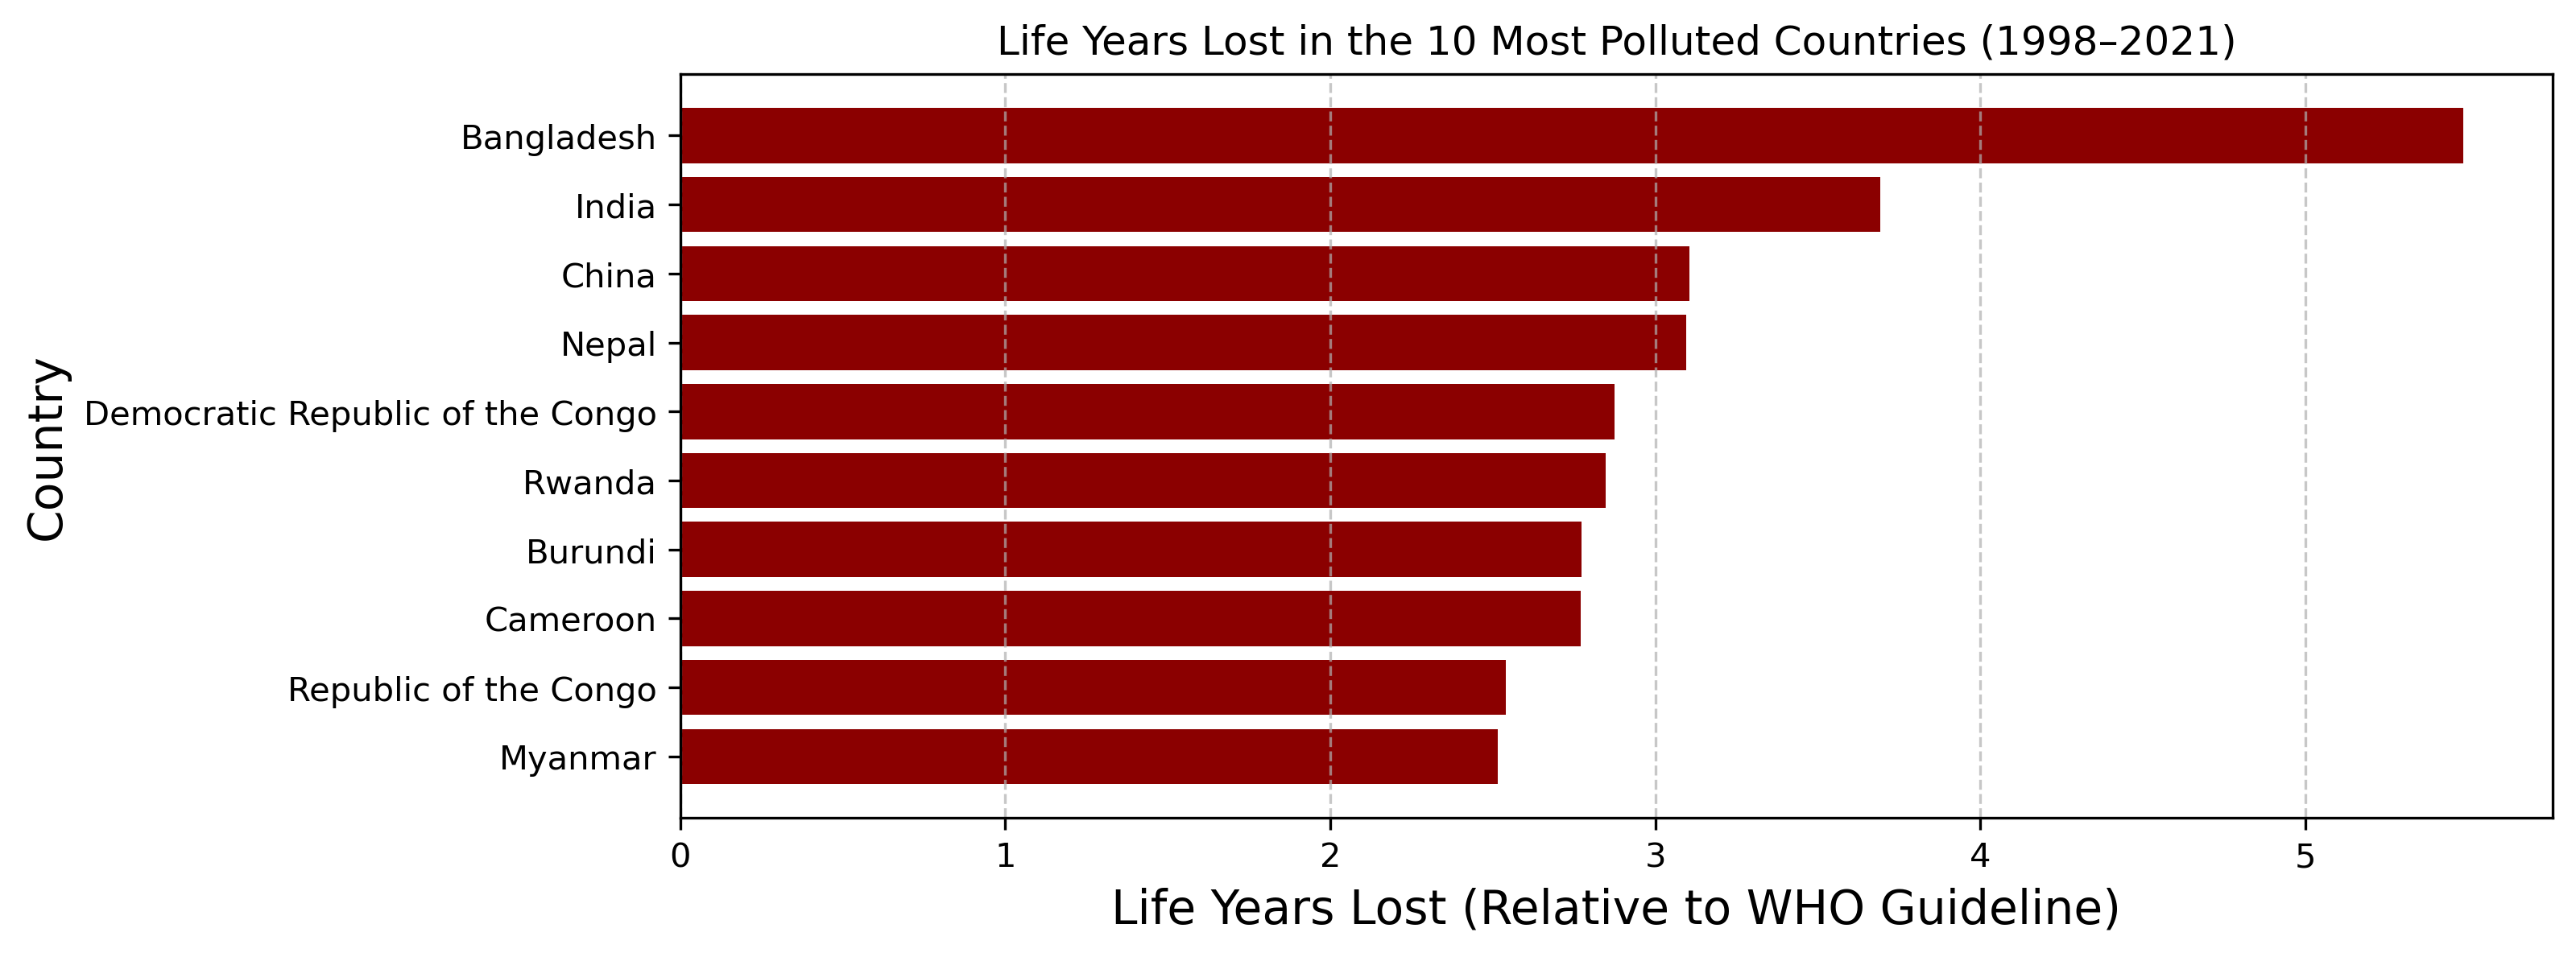

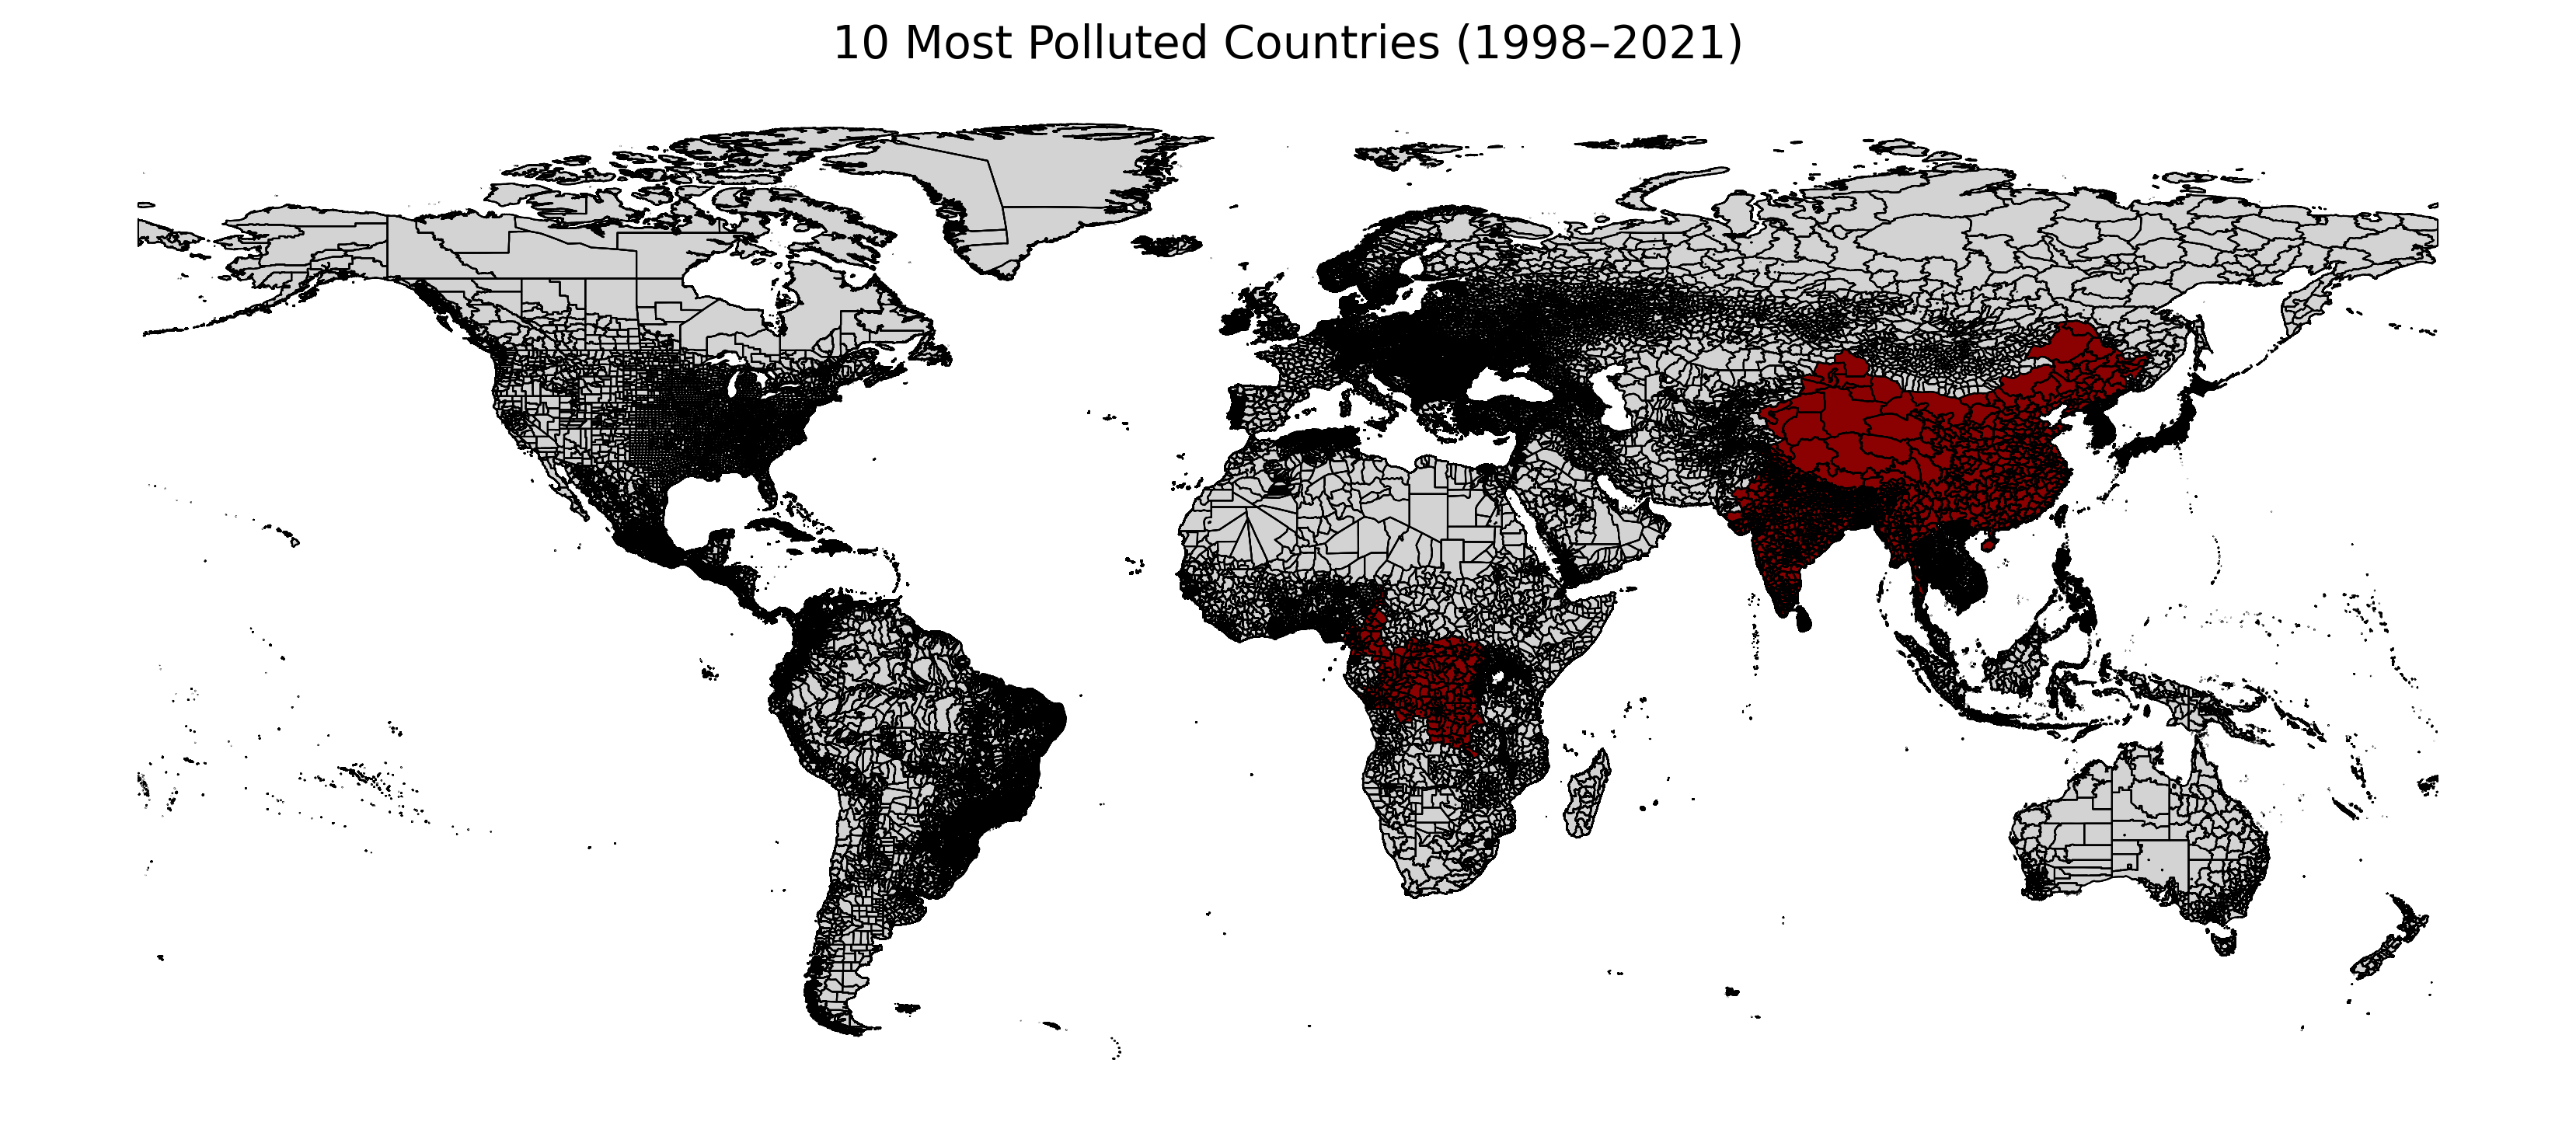

In [188]:

# Select all PM2.5 columns (from 1998–2021)
pm_columns = [col for col in df.columns if col.startswith("pm")]

# Select all life years lost (LLPP relative to WHO guideline)
llpp_who_columns = [col for col in df.columns if col.startswith("llpp_who")]

# Group by country and compute the average PM2.5 and LLPP across all years
country_data = df.groupby("country")[pm_columns + llpp_who_columns].mean().reset_index()

# Compute overall averages for PM2.5 and LLPP
country_data["pm25_overall_avg"] = country_data[pm_columns].mean(axis=1)
country_data["llpp_who_overall_avg"] = country_data[llpp_who_columns].mean(axis=1)

# Keep only relevant columns
country_data = country_data[["country", "pm25_overall_avg", "llpp_who_overall_avg"]]

# Find the 10 most polluted countries based on PM2.5
top_10_polluted = country_data.sort_values(by="pm25_overall_avg", ascending=False).head(10)

# Merge dataset with the shapefile using "name0" (country name column in shapefile)
gdf = gdf.merge(country_data, how="left", left_on="name0", right_on="country")

# Create a color column
gdf["color"] = "lightgray"  
gdf.loc[gdf["name0"].isin(top_10_polluted["country"]), "color"] = "darkred"  

# **1️⃣ Bar Graph: Life Years Lost in the 10 Most Polluted Countries**
plt.figure(figsize=(10, 4), dpi=300)
plt.barh(top_10_polluted["country"], top_10_polluted["llpp_who_overall_avg"], color="darkred")
plt.xlabel("Life Years Lost (Relative to WHO Guideline)", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.title("Life Years Lost in the 10 Most Polluted Countries (1998–2021)")
plt.gca().invert_yaxis()  # Flip order for readability
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Save the bar graph as a high-quality PNG
plt.savefig("Life_Years_Lost_Bar_Graph.png", dpi=300, bbox_inches="tight")
print("✅ Bar graph saved as 'Life_Years_Lost_Bar_Graph.png'.")

# **2️⃣ Global Map: Dark Red for Top 10 Polluted Countries, Gray for Others**
fig, ax = plt.subplots(1, 1, figsize=(14, 7), dpi=300)

# Plot the country boundaries
gdf.boundary.plot(ax=ax, linewidth=0.5, color="black")

# Fill the countries with assigned colors
gdf.plot(ax=ax, color=gdf["color"], edgecolor="black", linewidth=0.5)

# Remove axis labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
plt.title("10 Most Polluted Countries (1998–2021)", fontsize=14)

# Save the global map as a high-quality PNG
plt.savefig("Most_Polluted_Countries_Map.png", dpi=300, bbox_inches="tight")
print("✅ Global map saved as 'Most_Polluted_Countries_Map.png'.")



#### 2.3

Final AQLI-style map saved at global_air_pollution_map_final.svg


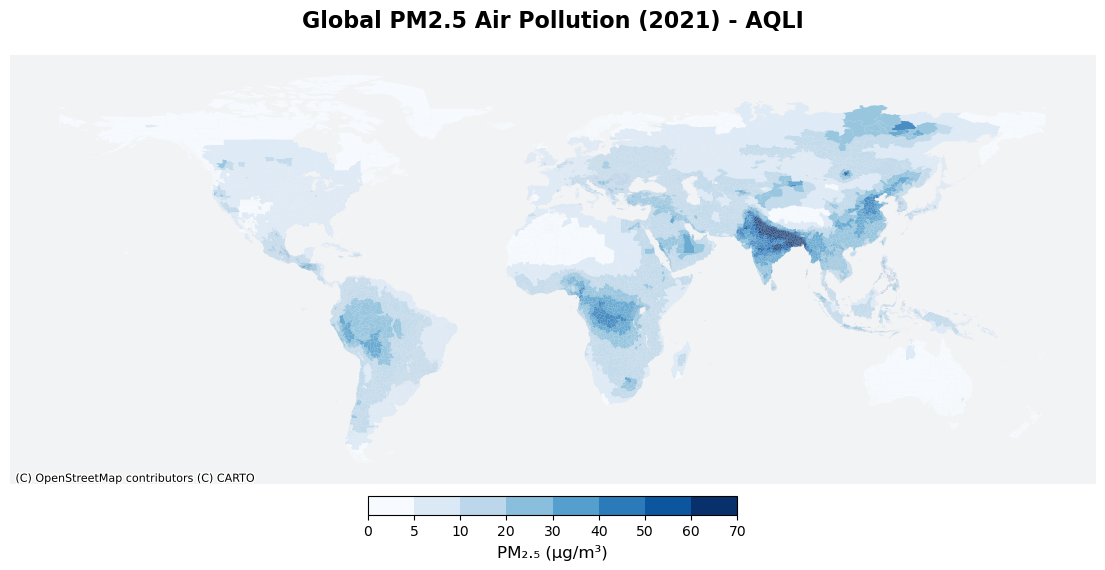

In [136]:

# Clean column names (remove spaces, convert to lowercase)
gdf.columns = gdf.columns.str.strip().str.lower()
df.columns = df.columns.str.strip().str.lower()

# Ensure both ID columns are the same type
df["objectid_gadm2"] = df["objectid_gadm2"].astype(str)
gdf["obidgadm2"] = gdf["obidgadm2"].astype(str)

# Merge the shapefile with the pollution data
gdf = gdf.merge(df[["objectid_gadm2", "pm2021"]], left_on="obidgadm2", right_on="objectid_gadm2", how="left")

# Define colour Scale
aqli_colors = ["#f7fbff", "#deebf7", "#c6dbef", "#9ecae1", "#6baed6", 
               "#4292c6", "#2171b5", "#08519c", "#08306b"]

# Create a colormap
cmap = mcolors.LinearSegmentedColormap.from_list("aqli_colors", aqli_colors)

# Define figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Define classification bins similar to AQLI
bins = [0, 5, 10, 20, 30, 40, 50, 60, 70]
norm = mcolors.BoundaryNorm(bins, cmap.N)

# Plot the map
gdf.plot(column="pm2021", cmap=cmap, norm=norm, alpha=0.85, edgecolor="none", ax=ax)

# Add a light basemap for context
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, alpha=0.3)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation="horizontal", fraction=0.03, pad=0.02)
cbar.set_label("PM₂.₅ (µg/m³)", fontsize=12)
cbar.set_ticks(bins)
cbar.ax.tick_params(labelsize=10)

# Title
ax.set_title("Global PM2.5 Air Pollution (2021) - AQLI", fontsize=16, fontweight="bold", pad=20)

# Remove axes for a cleaner map
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Save as high-quality SVG
output_path = "global_air_pollution_map_final.svg"
plt.savefig(output_path, format="svg", dpi=320, bbox_inches="tight")

print(f"Final AQLI-style map saved at {output_path}")


#### 2.2

Loading large PM₂.₅ CSV using Dask...
Converting Dask DataFrame to Pandas and merging at GADM Level 2...
Saving merged data to GeoParquet...


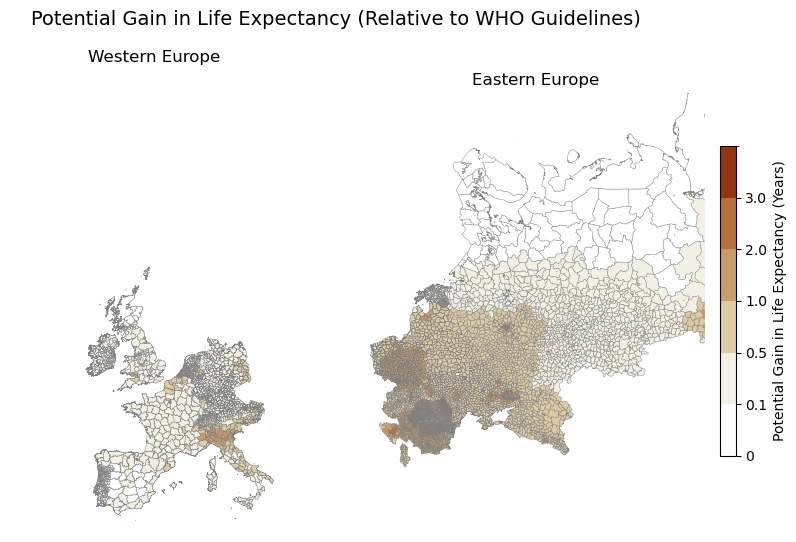

In [137]:
# Step 1: Load Large PM₂.₅ Dataset Efficiently with Dask
print("Loading large PM₂.₅ CSV using Dask...")
df = dd.read_csv("gadm2_aqli_1998_2021.csv", usecols=["objectid_gadm2", "name_1", "name_2", "pm2021"])


#Step 2: Filter for Europe Only 
# Source for Eastern vs. Western Europe: United Nations Geoscheme
east_europe = [
    "Belarus", "Bulgaria", "Czech Republic", "Hungary", "Poland", "Moldova",
    "Romania", "Russia", "Slovakia", "Ukraine", "Serbia", "Lithuania",
    "Latvia", "Estonia", "Albania", "Bosnia and Herzegovina", "North Macedonia"
]
west_europe = [
    "Austria", "Belgium", "France", "Germany", "Liechtenstein", "Luxembourg",
    "Monaco", "Netherlands", "Switzerland", "Spain", "Portugal", "Italy",
    "United Kingdom", "Ireland"
]

gdf = gdf[gdf["name0"].isin(east_europe + west_europe)]

#Step 3: Merge Large Datasets at **GADM Level 2**
print("Converting Dask DataFrame to Pandas and merging at GADM Level 2...")
df = df.compute()  # Convert Dask dataframe to Pandas
merged_gdf = gdf.merge(df, left_on=["name1", "name2"], right_on=["name_1", "name_2"])

#Step 5: Save as Smaller GeoParquet for Faster Access
print("Saving merged data to GeoParquet...")
merged_gdf.to_parquet("merged_data.parquet")

#Step 6: Define Eastern & Western Europe Regions
merged_gdf["region"] = merged_gdf["name0"].apply(
    lambda x: "Eastern Europe" if x in east_europe else "Western Europe"
)

# Step 7: Compute Average PM2.5 Over All Years (1998-2021)
pm_columns = [col for col in merged_gdf.columns if col.startswith("pm")]
merged_gdf["pm_avg"] = merged_gdf[pm_columns].mean(axis=1)

# Calculate Potential Gain in Life Expectancy
merged_gdf["life_expectancy_gain"] = 0.98 * ((merged_gdf["pm_avg"] - 5) / 10)
merged_gdf["life_expectancy_gain"] = merged_gdf["life_expectancy_gain"].clip(lower=0)  # Avoid negative values

merged_gdf = merged_gdf.dropna(subset=["life_expectancy_gain"])

# Step 8: Define Color Scale 

bins = [0, 0.1, 0.5, 1.0, 2.0, 3.0, 4.0]  # No need for 5+ since max is ~3.95
colors = ["#FFFFFF", "#F2F0E4", "#DDCBA4", "#C89B6B", "#B4703A", "#953411"]


# Create a custom color map
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(bins, cmap.N)


# Step 9: Side-by-Side Subplots for Western & Eastern Europe
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), sharex=False, sharey=True)

# Split dataset into Western & Eastern Europe
western_gdf = merged_gdf[merged_gdf["region"] == "Western Europe"]
eastern_gdf = merged_gdf[merged_gdf["region"] == "Eastern Europe"]

# Convert CRS to EPSG:3857
western_gdf = western_gdf.to_crs(epsg=3857)
eastern_gdf = eastern_gdf.to_crs(epsg=3857)

# Western Europe Plot
western_gdf.plot(column="life_expectancy_gain", cmap=cmap, norm=norm, 
                 linewidth=0.3, edgecolor="gray", ax=ax1)
ax1.set_title("Western Europe")

# Eastern Europe Plot
eastern_gdf.plot(column="life_expectancy_gain", cmap=cmap, norm=norm, 
                 linewidth=0.3, edgecolor="gray", ax=ax2)
ax2.set_title("Eastern Europe")

# Shared colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation="vertical", fraction=0.02, pad=0.02)
cbar.set_label("Potential Gain in Life Expectancy (Years)")
cbar.set_ticks(bins[:-1])
cbar.set_ticklabels(["0", "0.1", "0.5", "1.0", "2.0", "3.0"])

# Bounding Box Adjustments
west_bounds = {"minx": -2500000, "maxx": 2500000, "miny": 4000000, "maxy": 12000000}
east_bounds = {"minx": 1500000, "maxx": 8000000, "miny": 4000000, "maxy": 12000000}

ax1.set_xlim(west_bounds["minx"], west_bounds["maxx"])
ax1.set_ylim(west_bounds["miny"], west_bounds["maxy"])

ax2.set_xlim(east_bounds["minx"], east_bounds["maxx"])
ax2.set_ylim(east_bounds["miny"], east_bounds["maxy"])

# Remove axis ticks & frames
for ax in [ax1, ax2]:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

# Title
plt.suptitle("Potential Gain in Life Expectancy (Relative to WHO Guidelines)", fontsize=14)

# Save output
plt.savefig("Potential_Life_Expectancy_Gain_Europe_Subplot.pdf", dpi=300, bbox_inches="tight", format="pdf")
plt.show()
